In [1]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
exec(open('parameters.sh').read())


In [2]:
df = pd.read_csv('AST_ALT_ratio_plot_data.tsv', sep='\t')
df['component_order'] = df['component_order'] - 1 
df['trait_order'] = df['trait_order'] - 1
df['component'] = [str(x) for x in df['component']]


In [3]:
scaled_ct_dict = dict(zip(
    zip(df['component_order'], df['trait_order']),
    df['scaled_ct_score']
))

cumsum_dict = dict(zip(
    zip(df['component_order'], df['trait_order']),
    df['cumsum_scaled']
))


In [4]:
component_dict = dict(zip(
    df['component_order'], df['component']
))

trait_dict = dict(zip(
    df['trait_order'], df['trait_label']
))


In [5]:
hatchs = [
    '/',  '\\',   '|',  '-',    '+',  'x',  '',     'O',  '.',  '*',
    '//', '*O',   '||', '--\\', '++', 'xx', 'o',    'OO', '..', '**',
    '/o', '\\||', '|*', '--',   '+o', 'x*', '//**', 'O|', 'O.', '*-',
    '',   '\\++', '|x', '-O',   '\\\\'
]
# https://matplotlib.org/devdocs/gallery/shapes_and_collections/hatch_style_reference.html


In [6]:
len(set(hatchs))


34

we have black fill and white fill - so this is fine

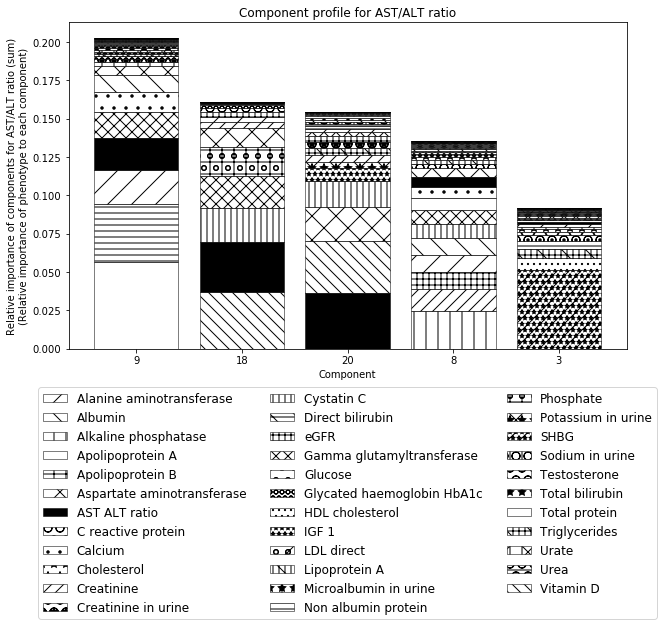

In [7]:
width = 0.8
fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(111)

n_components = 5
components = [component_dict[x] for x in range(n_components)]

for trait_idx in range(len(trait_dict)):
    ax.bar(
        components,
        [scaled_ct_dict[(c, trait_idx)] for c in range(n_components)],
        width,
        bottom = [cumsum_dict[(c, trait_idx)] for c in range(n_components)],
        label = trait_dict[trait_idx],
        hatch=hatchs[trait_idx],
        fill=True if trait_idx == 6 else False,
        color='black' if trait_idx == 6 else 'white',
        linewidth=.5,
        edgecolor='black'
    )

ax.set_xlabel('Component')
ax.set_ylabel('Relative importance of components for AST/ALT ratio (sum)\n(Relative importance of phenotype to each component)')
ax.set_title('Component profile for AST/ALT ratio')
ax.legend(
    ncol=3,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    prop={'size': 12}
)

fig.savefig("contribution_AST_ALT_ratio_gray.png", dpi=600, bbox_inches="tight")
fig.savefig("contribution_AST_ALT_ratio_gray.pdf", dpi=600, bbox_inches="tight")


## color version of the figure

In [10]:
cud4_cols_df = pd.read_csv(os.path.join(cud4_d, 'colors.tsv'), sep='\t') 
cud4_pals_df = pd.read_csv(os.path.join(cud4_d, 'palettes.txt'), sep='\t')


In [34]:
cud4_cols_dict = dict(zip(cud4_cols_df['color_key'], cud4_cols_df['hex']))

In [36]:
col_keys = cud4_pals_df.iloc[
    np.in1d(cud4_pals_df['palette_type'], ['accent_and_base_6']),
    1
].values[0].split(',')

In [37]:
col_keys

['orange', 'blue', 'brown', 'light_pink', 'cream', 'light_sky_blue']

In [66]:
# colors = [
#     #0
#     'orange', 'cream', 'brown', 'light_pink', 'light_sky_blue', 'orange',
#     #6
#     'black',
#     #7
#     'orange', 'blue', 'brown', 'light_pink', 'cream', 'light_sky_blue',
#     #13
#     'orange', 'blue', 'brown', 'light_pink', 'cream', 'light_sky_blue',
#     #19
#     'cream', 'blue', 'brown', 'light_pink', 'cream', 'light_sky_blue',
#     #25
#     'orange', 'light_pink', 'brown', 'light_pink', 'blue', 'light_sky_blue',
#     #31
#     'orange', 'blue', 'brown', 'blue'
# ]

colors = [
    #0
    'orange', 'cream', 'brown', 'light_pink', 'light_sky_blue', 'orange',
    #6
    'black',
    #7
    'orange', 'white', 'brown', 'light_pink', 'cream', 'light_sky_blue',
    #13
    'orange', 'white', 'brown', 'light_pink', 'cream', 'light_sky_blue',
    #19
    'cream', 'white', 'brown', 'light_pink', 'cream', 'light_sky_blue',
    #25
    'orange', 'light_pink', 'brown', 'light_pink', 'white', 'light_sky_blue',
    #31
    'orange', 'white', 'brown', 'white'
]


In [67]:
len(colors) 

35

In [68]:
# trait_dict

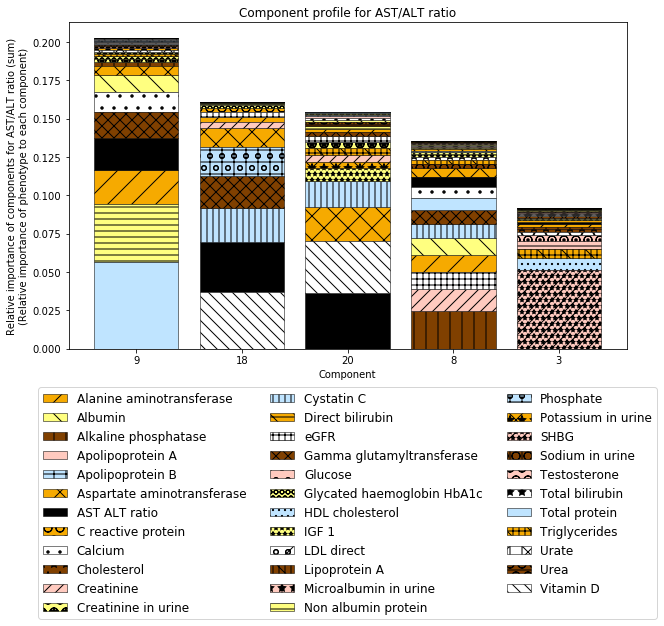

In [69]:
width = 0.8
fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(111)

n_components = 5
components = [component_dict[x] for x in range(n_components)]

for trait_idx in range(len(trait_dict)):
    ax.bar(
        components,
        [scaled_ct_dict[(c, trait_idx)] for c in range(n_components)],
        width,
        bottom = [cumsum_dict[(c, trait_idx)] for c in range(n_components)],
        label = trait_dict[trait_idx],
        hatch=hatchs[trait_idx],
        fill=True,
        color=cud4_cols_dict[colors[trait_idx]],
        linewidth=.5,
        edgecolor='black'
    )

ax.set_xlabel('Component')
ax.set_ylabel('Relative importance of components for AST/ALT ratio (sum)\n(Relative importance of phenotype to each component)')
ax.set_title('Component profile for AST/ALT ratio')
ax.legend(
    ncol=3,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    prop={'size': 12}
)

fig.savefig("contribution_AST_ALT_ratio_color.png", dpi=600, bbox_inches="tight")
fig.savefig("contribution_AST_ALT_ratio_color.pdf", dpi=600, bbox_inches="tight")
